In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# read in csv file
game_info_df=pd.read_csv("../data/boardgames_07022021.csv")
# remove duplicate games
game_info_df.drop_duplicates(subset=['objectid'], inplace=True)
# =========================================================================================================
# choose the features based on correlations
game_info_df=game_info_df[['average', 'numwanting', 'siteviews', 'blogs', 'minage', 'news',
                           'podcast', 'totalvotes', 'numcomments', 'numgeeklists', 'weblink']].copy()
# =========================================================================================================
# remove the rows which have invalid values
game_info_df.drop(game_info_df[game_info_df['average'] ==0].index, inplace = True)
game_info_df.drop(game_info_df[game_info_df['totalvotes'] ==0].index, inplace = True)
# drop the null rows
game_info_df.dropna(inplace=True)
game_info_df.head()

,average,numwanting,siteviews,blogs,minage,news,podcast,totalvotes,numcomments,numgeeklists,weblink
0,8.77503,1374,10583753,690,14,8,147,1171,8021,4649,40
1,8.60721,850,3385064,653,13,10,170,668,6552,3978,70
2,8.66981,1477,1816252,208,14,4,28,521,3303,1630,23
3,8.42870,2085,6059031,1473,12,16,163,1800,10034,7276,71
4,8.68957,979,2267902,99,14,3,53,335,2206,1010,23


## Select features, Create Train Test Split, Scale the data

In [2]:
# # Set features (X) and target (y)
# y=game_info_df['average']
# X=game_info_df.drop(['average'],axis=1)

# # Scale the data
# from sklearn.preprocessing import MinMaxScaler
# X_scaler = MinMaxScaler().fit(X)
# X_scaled = X_scaler.transform(X)

# X_scaled.shape, y.shape

In [3]:
# Set features (X) and target (y)
y=game_info_df['average']
X=game_info_df.drop(['average'],axis=1)

# Scale the data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X)
X_scaled = X_scaler.transform(X)

X_scaled.shape, y.shape

((20138, 10), (20138,))

## svm
* SVR
* NuSVR
* LinearSVR

In [4]:
from sklearn.svm import SVR
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# Create a Epsilon-Support Vector Regression model

regr = SVR(C=1.0, epsilon=0.2)
regr=regr.fit(X_scaled, y)

print(f"Training Data Score: {regr.score(X_scaled, y):.5f}")

Training Data Score: 0.42474


In [16]:
# Create the GridSearchCV model
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'epsilon': [0.1, 0.2, 0.5],'C':[1,5,10]}

grid = GridSearchCV(regr, param_grid, verbose=3, scoring="neg_mean_squared_error",return_train_score=True)

# Train the model with GridSearch
grid.fit(X_scaled, y)

print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END C=1, epsilon=0.1;, score=(train=-0.526, test=-0.765) total time=  12.8s
[CV 2/5] END C=1, epsilon=0.1;, score=(train=-0.543, test=-0.432) total time=  12.1s
[CV 3/5] END C=1, epsilon=0.1;, score=(train=-0.493, test=-0.686) total time=  12.2s
[CV 4/5] END C=1, epsilon=0.1;, score=(train=-0.568, test=-0.385) total time=  12.0s
[CV 5/5] END C=1, epsilon=0.1;, score=(train=-0.285, test=-1.742) total time=  12.0s
[CV 1/5] END C=1, epsilon=0.2;, score=(train=-0.525, test=-0.755) total time=  10.3s
[CV 2/5] END C=1, epsilon=0.2;, score=(train=-0.543, test=-0.435) total time=   9.9s
[CV 3/5] END C=1, epsilon=0.2;, score=(train=-0.494, test=-0.692) total time=  10.5s
[CV 4/5] END C=1, epsilon=0.2;, score=(train=-0.569, test=-0.386) total time=  10.8s
[CV 5/5] END C=1, epsilon=0.2;, score=(train=-0.285, test=-1.749) total time=   9.8s
[CV 1/5] END C=1, epsilon=0.5;, score=(train=-0.529, test=-0.753) total time=   5.9s
[CV 2

In [17]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score

# get the model predictions
predictions = grid.predict(X_scaled)

print(f"Grid Best Explained Variance Score: {explained_variance_score(y, predictions):.5f}")
print(f"Grid Best R2 Score: {r2_score(y, predictions):.5f}")

Grid Best Explained Variance Score: 0.45471
Grid Best R2 Score: 0.45446


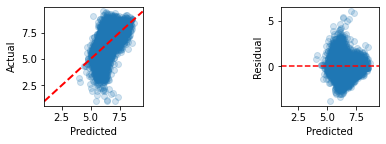

In [18]:
%matplotlib inline

fig = plt.figure()
#add subplots
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(233)
# Plot predictions vs actual values
ax1.scatter(predictions, y,alpha=0.2)
ax1.plot([y.min(), y.max()],[y.min(), y.max()],'--r', linewidth=2)
ax1.set_xlim([y.min(), y.max()])
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')
# Plot Residuals
ax2.scatter(predictions, predictions - y,alpha=0.2)
ax2.hlines(y=0, xmin=y.min(), xmax=y.max(),colors="r", linestyles='dashed', )
ax2.set_xlim([y.min(), y.max()])
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Residual')
plt.show()

In [19]:
fig.savefig("svm.svg", dpi=150)
fig.savefig("svm.png", dpi=150)